MSE: 15082213.680679627


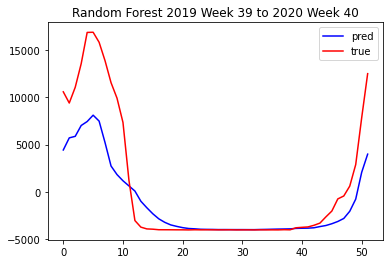

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import utils
import matplotlib.pyplot as plt
import numpy as np

datafile = 'preprocessed_data.csv'

window_size = 2
start = 2010
end = 2019
end_train = end - (window_size)*2
start_test = end_train + window_size
end_test = start_test

train_X, train_y, X_mean, X_std, y_mean, y_std, _ = utils.get_data(start, end_train, datafile)
test_X, test_y, _, _, _, _, _ = utils.get_data(start_test, end_test, datafile)

train_X = ( train_X - X_mean ) / X_std
test_X = ( test_X - X_mean ) / X_std

train_y = ( train_y - y_mean ) / y_std 
test_y = ( test_y - y_mean ) / y_std

rf = RandomForestRegressor(n_estimators=300, bootstrap=False)
rf.fit(train_X, train_y)
pred_y = rf.predict(test_X)

pred_y = pred_y * y_std - y_mean # de-norm
test_y = test_y * y_std - y_mean

weeks = [i for i in range(52)]
# for i,year in enumerate(range(2010, 2015)):
#     plt.plot(weeks, train_y[i], label=year+5)
# plt.legend()
print(f"MSE: {mean_squared_error(pred_y, test_y)}")
# compare test_y and pred_y
plt.plot(weeks, pred_y[0], label="pred", color="blue")
plt.plot(weeks, test_y[0], label="true", color="red")
plt.title(f"Random Forest {end} Week 39 to {end+1} Week 40")
plt.legend()

import pickle
pickle.dump(pred_y[0], open("results/RF_2019_pred_list", "wb"), 2)


In [16]:
# # randomized search below

# from pprint import pprint

# print('Parameters currently in use:\n')
# pprint(rf.get_params())

In [17]:
# '''
# How do we know where to start? A good place is the documentation on the random forest in Scikit-Learn.
# This tells us the most important settings are the number of trees in the forest (n_estimators) and the
# number of features considered for splitting at each leaf node (max_features).
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 
# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)
# '''
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)


In [18]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(train_X, train_y)

# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy
# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(train_X, train_y)
# base_accuracy = evaluate(base_model, test_X, test_y)

# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, test_X, test_y)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [19]:
# results = rf_random.cv_results_
# n_top = 5
# for i in range(1, n_top + 1):
#     candidates = np.flatnonzero(results['rank_test_score'] == i)
#     for candidate in candidates:
#         print("Model with rank: {0}".format(i))
#         print("Mean validation score: {0:.3f} (std: {1:.3f})"
#                 .format(results['mean_test_score'][candidate],
#                         results['std_test_score'][candidate]))
#         print("Parameters: {0}".format(results['params'][candidate]))
#         print("")